<a href="https://colab.research.google.com/github/anas1IA-art/Custom_data/blob/main/Custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare the data

In [1]:
import requests
import zipfile
from pathlib import Path

In [2]:
# Step 1: Download the specific gzip files
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz


--2024-09-09 07:27:36--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-images-idx3-ubyte.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz [following]
--2024-09-09 07:27:36--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [application/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  47.0MB/s    in 

In [3]:
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-images-idx3-ubyte.gz
!wget https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/t10k-labels-idx1-ubyte.gz

--2024-09-09 07:27:39--  https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz [following]
--2024-09-09 07:27:39--  https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515 (29K) [application/octet-stream]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.82K  --.-KB/s    in 0.0

In [4]:
# Step 2: Extract the gzip files
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz

In [5]:
import os
import numpy as np
from PIL import Image

In [6]:
# Define the directory structure
base_dir = 'fashion_mnist_dataset'

if os.path.isdir(base_dir):
    print(f"{base_dir} directory exists.")
else:
    print(f"Did not find {base_dir} directory, creating one...")
    os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
classes = ['tshirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


Did not find fashion_mnist_dataset directory, creating one...


In [7]:
# Create the directory structure
for d in [train_dir, test_dir]:
    os.makedirs(d, exist_ok=True)
    for c in classes:
        os.makedirs(os.path.join(d, c), exist_ok=True)

In [8]:
# Paths to the extracted files
train_images_path = 'train-images-idx3-ubyte'
train_labels_path = 'train-labels-idx1-ubyte'
test_images_path = 't10k-images-idx3-ubyte'
test_labels_path = 't10k-labels-idx1-ubyte'

In [9]:
# Helper function to load MNIST data
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>u4')[0]
        num = np.frombuffer(f.read(4), dtype='>u4')[0]
        rows = np.frombuffer(f.read(4), dtype='>u4')[0]
        cols = np.frombuffer(f.read(4), dtype='>u4')[0]
        print(f"Magic number: {magic}, Number of images: {num}, Rows: {rows}, Columns: {cols}")
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
    return images

In [10]:
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>u4')[0]
        num = np.frombuffer(f.read(4), dtype='>u4')[0]
        print(f"Magic number: {magic}, Number of labels: {num}")
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [11]:
def save_images(images, labels, base_dir,new_size=(56, 56)):
    for idx, (image, label) in enumerate(zip(images, labels)):
        class_name = classes[label]
        image_dir = os.path.join(base_dir, class_name)
        image_path = os.path.join(image_dir, f'image_{idx:04d}.jpeg')
        image = Image.fromarray(image)
        image = image.resize(new_size, Image.ANTIALIAS)
        image.save(image_path)

In [12]:
# Load and save training images
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
save_images(train_images, train_labels, train_dir,new_size=(28,28))

Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 60000


<ipython-input-11-81941a92c02b>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_size, Image.ANTIALIAS)


In [13]:
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)
save_images(test_images, test_labels, test_dir,new_size=(28,28))

Magic number: 2051, Number of images: 10000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 10000


<ipython-input-11-81941a92c02b>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(new_size, Image.ANTIALIAS)


In [14]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [15]:
walk_through_dir("./fashion_mnist_dataset")

There are 2 directories and 0 images in './fashion_mnist_dataset'.
There are 10 directories and 0 images in './fashion_mnist_dataset/train'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/trouser'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/coat'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/shirt'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/bag'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/sandal'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/tshirt_top'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/pullover'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/ankle_boot'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/dress'.
There are 0 directories and 6000 images in './fashion_mnist_dataset/train/sneaker'.
There are 10 directories

In [16]:
import random
from pathlib import Path
from PIL import Image

In [17]:
random.seed(42)
base_dir = Path('./fashion_mnist_dataset')

list_images = list(base_dir.glob("*/*/*.jpeg"))

In [18]:
image_path = random.choice(list_images)

In [19]:
image_path

PosixPath('fashion_mnist_dataset/train/shirt/image_30445.jpeg')

In [20]:
image_class = image_path.parent.stem

In [21]:
image = Image.open(image_path)

In [22]:
print(f'path of image is : {image_path}')
print(f' Image class is : {image_class} ')
print(f'Image height is :{image.height}')
print(f'Image with is : {image.width}')



path of image is : fashion_mnist_dataset/train/shirt/image_30445.jpeg
 Image class is : shirt 
Image height is :28
Image with is : 28


In [23]:
image

We can do the same with **matplotlib.pyplot.imshow()**, except we have to convert the image to a NumPy array first.

In [24]:
import matplotlib.pyplot as plt
import numpy as np


In [25]:
from numpy import asarray

In [26]:
numpydata = asarray(image)

In [27]:
numpydata

array([[  0,   2,   0,   1,   0,   0,   6,   0,   0,   1,   2,  72, 180,
        156, 156, 178, 124,   0,   4,   0,   4,  14,   0,   0,   0,   0,
          0,   0],
       [  0,  11,   2,   2,   9,  17,   0,   0,   1,   4,  15, 194, 230,
        195, 165, 255, 233,   0,   0,   6,   0,   6,   0,  21,   0,   0,
          0,   0],
       [  0,  14,   0,   0,   0,   0,   0,  21,  51, 123, 220, 198, 213,
        143, 209, 242, 191, 182, 150,  73,   0,   0,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   1,   0,  73, 151, 197, 222, 196, 219, 196,
        251, 223, 200, 143, 198, 183, 199, 163,  65,   0,   0,   0,   0,
          0,   0],
       [  7,   0,   0,  12,   4,   4, 171, 214, 189, 175, 194, 186, 203,
        200, 203, 177, 181, 166, 166, 141, 173, 172,  14,  14,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   0,  42, 200, 173, 192, 194, 206, 187, 188,
        204, 185, 152, 173, 147, 182, 175, 168, 165,  51,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   2, 117, 212, 179, 196, 180, 181, 189, 177,
        181, 157, 175, 163, 171, 165, 162, 164, 166, 131,   0,   0,   0,
          0,   0],
       [  7,   1,   5,   0,   0, 145, 183, 192, 197, 190, 201, 181, 188,
        190, 174, 184, 168, 173, 171, 138, 176, 184, 117,   8,   0,   0,
          0,   0],
       [  0,   6,   2,   1,   0, 178, 188, 190, 216, 173, 177, 209, 171,
        174, 184, 173, 169, 153, 163, 149, 183, 171, 145,   4,   0,   0,
          0,   0],
       [  0,   3,   0,   0,   0, 199, 191, 193, 216, 183, 183, 193, 176,
        177, 173, 174, 168, 168, 160, 139, 198, 169, 163,   4,   0,   0,
          0,   0],
       [  3,   0,   0,   0,   2, 222, 186, 191, 223, 188, 187, 178, 182,
        182, 165, 177, 167, 179, 151, 141, 213, 162, 186,   1,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   6, 232, 177, 186, 238, 183, 185, 178, 184,
        185, 169, 181, 168, 175, 143, 164, 215, 152, 202,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   0,  21, 234, 175, 188, 245, 182, 181, 190, 179,
        183, 176, 178, 174, 164, 144, 187, 212, 150, 209,   8,   0,   0,
          0,   0],
       [  0,   0,   4,   6,  46, 230, 182, 192, 215, 196, 180, 197, 174,
        180, 176, 175, 179, 159, 155, 169, 216, 157, 208,  31,   0,   0,
          0,   0],
       [  0,   0,   0,   8,  70, 221, 187, 187, 145, 217, 178, 191, 172,
        185, 171, 180, 175, 163, 167, 105, 224, 167, 201,  56,   0,   0,
          0,   0],
       [  4,   0,   0,   8,  83, 212, 185, 175,  82, 232, 176, 180, 174,
        191, 168, 189, 168, 167, 173,  45, 231, 172, 193,  72,   0,   0,
          0,   0],
       [  5,   0,   4,   2,  96, 196, 200, 155,  49, 240, 188, 183, 176,
        185, 176, 180, 170, 168, 190,  39, 186, 183, 196,  79,   0,   0,
          0,   0],
       [  0,   0,   0,   3, 101, 196, 213, 109,  30, 235, 177, 176, 177,
        183, 176, 177, 171, 165, 187,  28, 137, 182, 181,  92,   0,   0,
          0,   0],
       [  0,   0,   0,   5, 106, 193, 231,  45,  27, 246, 177, 179, 186,
        186, 182, 177, 175, 167, 198,  34,  87, 201, 169, 109,   0,   0,
          0,   0],
       [  0,   5,   0,   5, 106, 189, 242,   0,  41, 255, 184, 184, 191,
        186, 182, 174, 174, 167, 209,  54,  52, 228, 162, 114,   0,   0,
          0,   0],
       [  0,   8,   0,   3, 104, 189, 240,   0,  53, 255, 186, 184, 185,
        183, 176, 171, 172, 165, 207,  64,  24, 234, 160, 106,   0,   0,
          0,   0],
       [  0,   2,   0,   0, 106, 196, 214,   1,  62, 241, 187, 188, 181,
        187, 176, 178, 178, 170, 202,  68,   6, 220, 167,  95,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 111, 203, 170,   5,  68, 217, 191, 197, 180,
        196, 177, 186, 179, 179, 203,  78,   2, 193, 173,  79,   0,   0,
          0,   0],
       [  5,   0,   0,   1, 115, 206, 133,   0,  68, 199, 192, 201, 177,
        198, 172, 185, 170, 180, 203,  86,   4, 171, 171,  59,   0,   0,
          0,   0],
       [  2,   0,   0,   9, 120, 222, 12

In [28]:
np_img = np.array(image)

In [29]:
np_img

array([[  0,   2,   0,   1,   0,   0,   6,   0,   0,   1,   2,  72, 180,
        156, 156, 178, 124,   0,   4,   0,   4,  14,   0,   0,   0,   0,
          0,   0],
       [  0,  11,   2,   2,   9,  17,   0,   0,   1,   4,  15, 194, 230,
        195, 165, 255, 233,   0,   0,   6,   0,   6,   0,  21,   0,   0,
          0,   0],
       [  0,  14,   0,   0,   0,   0,   0,  21,  51, 123, 220, 198, 213,
        143, 209, 242, 191, 182, 150,  73,   0,   0,  14,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   1,   0,  73, 151, 197, 222, 196, 219, 196,
        251, 223, 200, 143, 198, 183, 199, 163,  65,   0,   0,   0,   0,
          0,   0],
       [  7,   0,   0,  12,   4,   4, 171, 214, 189, 175, 194, 186, 203,
        200, 203, 177, 181, 166, 166, 141, 173, 172,  14,  14,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   0,  42, 200, 173, 192, 194, 206, 187, 188,
        204, 185, 152, 173, 147, 182, 175, 168, 165,  51,   0,   0,   0,
          0,   0],
       [  0,   0,   2,   0,   2, 117, 212, 179, 196, 180, 181, 189, 177,
        181, 157, 175, 163, 171, 165, 162, 164, 166, 131,   0,   0,   0,
          0,   0],
       [  7,   1,   5,   0,   0, 145, 183, 192, 197, 190, 201, 181, 188,
        190, 174, 184, 168, 173, 171, 138, 176, 184, 117,   8,   0,   0,
          0,   0],
       [  0,   6,   2,   1,   0, 178, 188, 190, 216, 173, 177, 209, 171,
        174, 184, 173, 169, 153, 163, 149, 183, 171, 145,   4,   0,   0,
          0,   0],
       [  0,   3,   0,   0,   0, 199, 191, 193, 216, 183, 183, 193, 176,
        177, 173, 174, 168, 168, 160, 139, 198, 169, 163,   4,   0,   0,
          0,   0],
       [  3,   0,   0,   0,   2, 222, 186, 191, 223, 188, 187, 178, 182,
        182, 165, 177, 167, 179, 151, 141, 213, 162, 186,   1,   0,   0,
          0,   0],
       [  4,   0,   0,   0,   6, 232, 177, 186, 238, 183, 185, 178, 184,
        185, 169, 181, 168, 175, 143, 164, 215, 152, 202,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   0,  21, 234, 175, 188, 245, 182, 181, 190, 179,
        183, 176, 178, 174, 164, 144, 187, 212, 150, 209,   8,   0,   0,
          0,   0],
       [  0,   0,   4,   6,  46, 230, 182, 192, 215, 196, 180, 197, 174,
        180, 176, 175, 179, 159, 155, 169, 216, 157, 208,  31,   0,   0,
          0,   0],
       [  0,   0,   0,   8,  70, 221, 187, 187, 145, 217, 178, 191, 172,
        185, 171, 180, 175, 163, 167, 105, 224, 167, 201,  56,   0,   0,
          0,   0],
       [  4,   0,   0,   8,  83, 212, 185, 175,  82, 232, 176, 180, 174,
        191, 168, 189, 168, 167, 173,  45, 231, 172, 193,  72,   0,   0,
          0,   0],
       [  5,   0,   4,   2,  96, 196, 200, 155,  49, 240, 188, 183, 176,
        185, 176, 180, 170, 168, 190,  39, 186, 183, 196,  79,   0,   0,
          0,   0],
       [  0,   0,   0,   3, 101, 196, 213, 109,  30, 235, 177, 176, 177,
        183, 176, 177, 171, 165, 187,  28, 137, 182, 181,  92,   0,   0,
          0,   0],
       [  0,   0,   0,   5, 106, 193, 231,  45,  27, 246, 177, 179, 186,
        186, 182, 177, 175, 167, 198,  34,  87, 201, 169, 109,   0,   0,
          0,   0],
       [  0,   5,   0,   5, 106, 189, 242,   0,  41, 255, 184, 184, 191,
        186, 182, 174, 174, 167, 209,  54,  52, 228, 162, 114,   0,   0,
          0,   0],
       [  0,   8,   0,   3, 104, 189, 240,   0,  53, 255, 186, 184, 185,
        183, 176, 171, 172, 165, 207,  64,  24, 234, 160, 106,   0,   0,
          0,   0],
       [  0,   2,   0,   0, 106, 196, 214,   1,  62, 241, 187, 188, 181,
        187, 176, 178, 178, 170, 202,  68,   6, 220, 167,  95,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 111, 203, 170,   5,  68, 217, 191, 197, 180,
        196, 177, 186, 179, 179, 203,  78,   2, 193, 173,  79,   0,   0,
          0,   0],
       [  5,   0,   0,   1, 115, 206, 133,   0,  68, 199, 192, 201, 177,
        198, 172, 185, 170, 180, 203,  86,   4, 171, 171,  59,   0,   0,
          0,   0],
       [  2,   0,   0,   9, 120, 222, 12

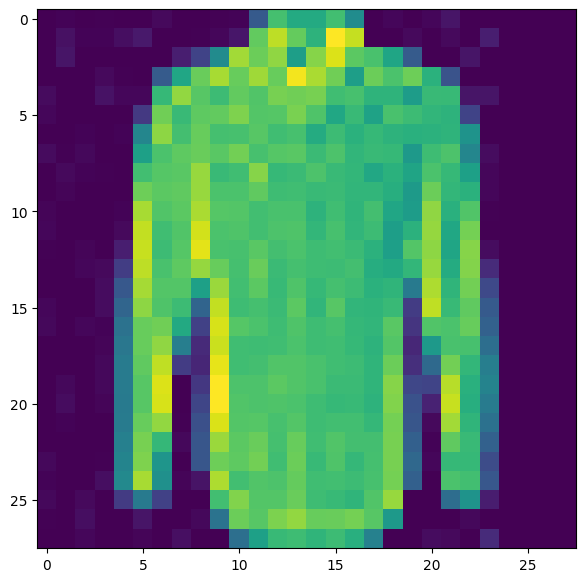

In [30]:
plt.figure(figsize=(10, 7))
plt.imshow(np_img)

## Transforming data

In [31]:
import torch
from torchvision import datasets ,transforms

Transform the data using **torchvision.datasets** for loading our dataset and **torchvision.transform** for preparing our data

I 'm going to build a  to create a custom Dataste to replacite ImageFolder
let's break  down

1 : create subclass  of *torch.utils.data.Dataset*

2 : as intialize our subclass with *targ_dir paremater* (the trajectoire of our data directory )  and  *transform* ( so we have the option of transform our data  if we  needed )

3:  create several attributes  like *paths* (paths for images )  and *trabsform* (the transform we can use it if we like but if not we can intialize it as  None )  class_names and classses _to_index ( we can create a function that return classes_names and classes_to_index we named as *find_classes()*)

4 : create a function  to load images from file and returm them

5 : overwrite the function __len__ method  of torch.utile.data.dataset that return the number of samples that exist  in the Dataset ,this is recommended but is not required

6 :  overwrite the fucntion __getitem__ method  of torch.utile.dataset to return  a single sample from dataset , this is required

Lest 's code that

In [32]:
from torch.utils.data import Dataset

from typing import List ,Tuple ,Dict

In [33]:
def  find_class (directory :str )-> Tuple[List[str],Dict[str ,int]]:

  classes  = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir() or entry.is_file())

  classes_to_index = {cols_name:i for i , cols_name in enumerate(classes)}

  return classes ,classes_to_index

In [34]:
find_class(test_dir)

(['ankle_boot',
  'bag',
  'coat',
  'dress',
  'pullover',
  'sandal',
  'shirt',
  'sneaker',
  'trouser',
  'tshirt_top'],
 {'ankle_boot': 0,
  'bag': 1,
  'coat': 2,
  'dress': 3,
  'pullover': 4,
  'sandal': 5,
  'shirt': 6,
  'sneaker': 7,
  'trouser': 8,
  'tshirt_top': 9})

In [35]:
 l = list(base_dir.glob("*/*/*.jpeg"))
 l[5].parent.name

'trouser'

In [36]:
# import torch
# from PIL import Image
# from torchvision import transforms

# def transform_to_tensor(image: Image.Image) -> torch.Tensor:
#     transform = transforms.Compose([
#         transforms.Resize((28, 28)),  # Pass a tuple here
#         transforms.ToTensor(),
#         transforms.RandomVerticalFlip(p=0.5)
#     ])

#     return transform(image)


In [37]:
 def transform_ToTenser(image: Image.Image) ->torch.Tensor:
  transform = transforms.Compose([transforms.Resize((64,64)),
                                  transforms.ToTensor(),
                                  transforms.RandomVerticalFlip(p = 0.5)])

  return transform(image)





In [38]:
transform_ToTenser(image)[0][20]

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0078, 0.0000, 0.0078, 0.0157, 0.1059,
        0.2784, 0.4471, 0.5922, 0.7373, 0.8235, 0.9020, 0.6902, 0.3216, 0.0902,
        0.1137, 0.1608, 0.5333, 0.9020, 0.8902, 0.7686, 0.7098, 0.7098, 0.7176,
        0.7294, 0.7412, 0.7373, 0.7333, 0.7255, 0.7176, 0.7098, 0.6980, 0.6863,
        0.6863, 0.6824, 0.6745, 0.6627, 0.6863, 0.7490, 0.7412, 0.4706, 0.1961,
        0.2118, 0.2549, 0.4314, 0.6824, 0.8157, 0.7294, 0.6431, 0.5490, 0.4588,
        0.2902, 0.0980, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [39]:
img3 = Image.open(l[200])
img3.size

(28, 28)

In [40]:
imagf = np.asarray(img3)
imagf.shape

(28, 28)

In [41]:
imgnumpy = transforms.ToPILImage(np.asarray(img3))
imgnumpy

ToPILImage(mode=[[  0   0   0   0   0   0   0   0   0 157 120 123 142 153 112 154 107 104
  151  22   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8 237 246 255 255 248 211 239 255 240
  255  97  15   3   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27 250 221 222 223 236 226 237 221 203
  240 110   0   0   1   5   0   0   0   0]
 [  0   0   0   0   0   0   0   0  69 255 204 213 226 241 232 217 230 215
  255 161   8   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  74 255 211 231 231 230 224 221 225 205
  239 169   0   0   9   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0 100 255 214 231 224 225 220 234 240 220
  238 188   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 101 247 212 228 225 235 208 214 216 210
  226 201   1  11   1   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0 107 248 217 215 208 240 223 243 224 220
  223 200   0   3   0   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0 105 255 209 21

In [43]:
# imgPil = transforms.ToPILImage(t)
# imgPil.mode[0][20]

In [45]:
# t = transfom_ToTenser( Image.open( l[20]))
# t.shape, t

In [46]:
import torch
import os
import pathlib
import torch


In [47]:
len(list(pathlib.Path('fashion_mnist_dataset').glob('*/*/*.jpeg')))

70000

In [48]:
# from typing_extensions import

class DatasetImageFolder(Dataset):

  def __init__(self, targ_dir: str , transform = None ):

      # super().__init__()
      self.targ_dir =  targ_dir
      self.transform = transform
      self.paths =list(pathlib.Path(targ_dir).glob('*/*.jpeg'))
      self.classes , self.classes_to_index = find_class(targ_dir)

  # create a function to load image,s from file and returm them
  def load_images(self, idex: int  )->Image.Image:

    image = self.paths[idex]

    return Image.open(image)
  #overwrite the function len method of torch.utile.data.dataset that return the number of samples that exist in the Dataset ,this is recommended but is not required
  def __len__(self)->int:

    return len(self.paths)


  def __getitem__(self, index)-> Tuple[torch.Tensor, int]:

    image = self.load_images(idex=index)  # This should return a PIL.Image
    class_name = self.paths[index].parent.name
    class_index = self.classes_to_index[class_name]

    if self.transform:
        image = self.transform(image)  # Transform the PIL.Image to a torch.Tensor
    return image, class_index


In [58]:
train_custom_data  = DatasetImageFolder(targ_dir = train_dir ,transform =   transform_ToTenser)

test_custom_data  = DatasetImageFolder(targ_dir = test_dir ,transform = transform_ToTenser )


In [61]:
len(train_custom_data),len(test_custom_data)

(60000, 10000)

In [66]:
train_custom_data.load_images(0)

In [65]:
test_custom_data.load_images(0)

In [53]:
type(list(pathlib.Path(train_dir).glob('*/*.jpeg'))[0])

pathlib.PosixPath

In [54]:
Image.open(list(pathlib.Path(train_dir).glob('*/*.jpeg'))[0])

In [67]:
image , label = train_custom_data[0][0], train_custom_data[0][1]
image,label

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 8)

In [68]:
image[0][20]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
        0.0118, 0.0314, 0.2392, 0.4510, 0.6039, 0.7451, 0.7765, 0.6902, 0.6353,
        0.6980, 0.7608, 0.8078, 0.8549, 0.8588, 0.8431, 0.8157, 0.7882, 0.7608,
        0.7333, 0.7020, 0.7490, 0.8118, 0.7961, 0.6902, 0.5569, 0.2941, 0.0353,
        0.0118, 0.0078, 0.0039, 0.0039, 0.0000, 0.0039, 0.0039, 0.0078, 0.0118,
        0.0078, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

# Turn  train  and test custom date into  dataloaders

In [70]:
from torch.utils.data import DataLoader

In [90]:
NUMER_OF_Works = os.cpu_count()
# print(NUMER_OF_Works)

In [91]:
train_dataloaders  =  DataLoader(train_custom_data, batch_size = 10,num_workers= NUMER_OF_Works , shuffle =  True)
test_dataloaders  =  DataLoader(test_custom_data, batch_size = 10,num_workers= NUMER_OF_Works,  shuffle =  True)

In [92]:
train_features, train_labels = next(iter(train_dataloaders))

In [93]:
print(f" featres batch size is {train_features.shape}" )

 featres batch size is torch.Size([10, 1, 64, 64])


In [94]:
print(f"the labels batch size  is {train_labels.shape[0]}" )

the labels batch size  is 10


# Transforming and augmenting data

 Data augmentation: is the process of artificially adding the diversity to our training data.


 Data augmentation for images : in the case  of image data , this may mean appluing varios image  tramformations to the training images .

 this practice allows to model to learn or it gets a chnce to view the perspective  so that  when you use your image classfication  it's seen the same  sort of images  but from differnet perspectives so that when you use  your image classification  model in practice  it's seen the same  sort  of images but from many  differnet angles

 blog : https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/

In [ ]:
#https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py